# Some Information About Our Dataset

## Title: Parkinsons Disease Data Set
## Abstract: Oxford Parkinson's Disease Detection Dataset

## ***Source*** 

#### The dataset was created by Max Little of the University of Oxford, in 
#### collaboration with the National Centre for Voice and Speech, Denver, 
#### Colorado, who recorded the speech signals. The original study published the 
#### feature extraction methods for general voice disorders.

> Attribute Information:

>>- MDVP:Fo(Hz)  ::: Average vocal fundamental frequency
>>- MDVP:Fhi(Hz) ::: Maximum vocal fundamental frequency
>>- MDVP:Flo(Hz) ::: Minimum vocal fundamental frequency
>>- MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP ::: Several measures of variation in fundamental frequency
>>- MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA ::: Several measures of variation in amplitude
>>- NHR, HNR ::: Two measures of ratio of noise to tonal components in the voice
>>- status ::: Health status of the subject (one) - Parkinson's & (zero) - healthy
>>- RPDE, D2 ::: Two nonlinear dynamical complexity measures
>>- DFA ::: Signal fractal scaling exponent
>>- spread1, spread2, PPE ::: Three nonlinear measures of fundamental frequency variation 

# Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump, load
%matplotlib inline  

# Read Dataset

In [2]:
#### READ DATA ####
path = r"parkinsons.csv"
data = pd.read_csv(path)
data =data.sample(frac=1,random_state=5).reset_index(drop=True)   #Shuffling Data

In [3]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S20_6,98.804,102.305,87.804,0.00432,0.00004,0.00247,0.00258,0.00742,0.02223,...,0.03831,0.00882,22.244,0.576644,0.772416,-6.025367,0.078202,2.053601,0.177275,1
1,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756,1
2,phon_R01_S43_3,113.715,116.443,96.913,0.00349,0.00003,0.00171,0.00203,0.00514,0.01472,...,0.02245,0.00478,26.547,0.380253,0.766700,-5.943501,0.192150,1.852542,0.179677,0
3,phon_R01_S06_5,155.358,227.383,80.055,0.00310,0.00002,0.00159,0.00176,0.00476,0.01718,...,0.02307,0.00677,25.970,0.470478,0.676258,-7.120925,0.279789,2.241742,0.108514,1
4,phon_R01_S43_6,116.388,129.038,108.970,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,...,0.02623,0.00415,26.143,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429,0


In [4]:
#Know Number Of Null Values
data.isna().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

In [5]:
#Get the count of each target (0 and 1) 
data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

# DEFINE DATA

In [6]:
#### define features and target ####
features=np.array( data.drop(columns=["name","status"],axis=1) ) # 22
target  =np.array( data["status"] )   # 1

print(f"Feature'shape {features.shape}")
print(f"Target'shape  {target.shape}"  )

Feature'shape (195, 22)
Target'shape  (195,)


# SHOWING DATA

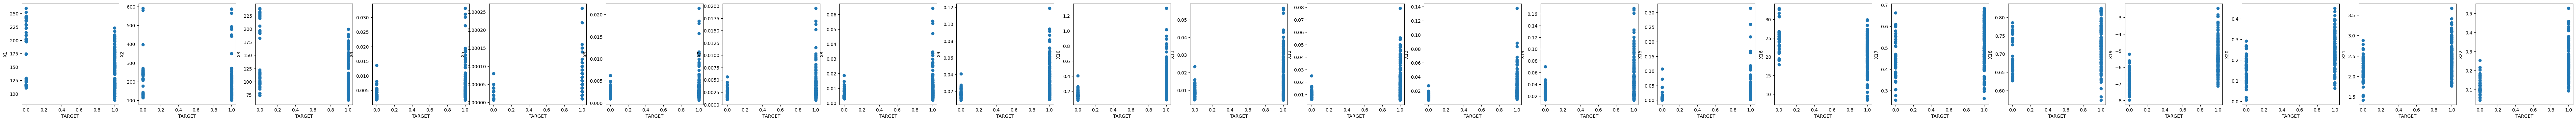

In [7]:
#### DATA SCATTER ####
fig,ax=plt.subplots(1, 22, figsize=(100, 4))

for i in range(len(ax)):
    ax[i].scatter(target,features[:,i])
    ax[i].set_ylabel(f"X{i+1}")
    ax[i].set_xlabel("TARGET")
plt.show()

# Scalling The Data  

In [8]:
### Scale/normalize the features to between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
N_features0=scaler.fit_transform(features)
N_target0=target

# **Problem 1**

> Over Fitting In

>>- Decesion Tree
>>- Support Vector Classifier

>![](3.png)

>![](2.png)

>And No Over Fitting IN
>>- Logistic Regression
>>- K Nearest Neighbor

>![](1.png)
>![](4.png)

# ----------------------------------------------------------------

# Solve Problem Of Support Vector Classifier

In [9]:
### Scale/normalize the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
N_features1=scaler.fit_transform(features)
N_target1=target

>![](6.png)

# ---------------------------------------------------------------------------------------

#### Some Data To Predict

In [10]:
Positive=[[176.858,205.56,75.344,0.00747,0.00004,0.00418,0.0042,0.01254,0.04795,0.435,0.02679,0.03022,0.0351,0.08037,0.0547,13.893,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119],
          [178.222,202.45,141.047,0.00321,0.00002,0.00163,0.00194,0.00488,0.03759,0.327,0.02073,0.02415,0.02784,0.06219,0.03151,15.924,0.598714,0.712199,-6.366916,0.335753,2.654271,0.144614],
          [173.898,211.35,74.677,0.00448,0.00003,0.00237,0.00254,0.0071,0.06727,0.65,0.03788,0.04254,0.04802,0.11363,0.04214,14.739,0.599371,0.743937,-5.783272,0.299793,3.007096,0.194052],
          [125.036,143.946,116.187,0.0128,0.0001,0.00743,0.00623,0.02228,0.03886,0.342,0.02135,0.02174,0.03088,0.06406,0.08151,15.338,0.629574,0.714485,-4.020042,0.265315,2.671825,0.340623],
          [125.641,141.068,116.346,0.03316,0.00026,0.02144,0.01522,0.06433,0.09178,0.891,0.05358,0.04791,0.06196,0.16074,0.31482,8.867,0.671299,0.656846,-3.700544,0.260481,2.991063,0.370961]  ]

Negative=[[129.336,139.867,118.604,0.0049,0.00004,0.00165,0.00183,0.00495,0.02498,0.228,0.01396,0.01219,0.01947,0.04188,0.00484,25.429,0.420383,0.785714,-6.836811,0.269866,2.223719,0.147491],
          [128.001,138.052,122.08,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.21,0.01323,0.01072,0.01677,0.03969,0.00481,24.692,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308],
          [122.188,128.611,115.765,0.00524,0.00004,0.00169,0.00203,0.00507,0.01613,0.143,0.00855,0.00776,0.01433,0.02566,0.00839,23.162,0.579597,0.733659,-6.439398,0.266392,2.079922,0.133867],
          [245.51,262.09,231.848,0.00235,0.00001,0.00127,0.00148,0.0038,0.01608,0.141,0.00906,0.00977,0.01149,0.02719,0.00476,24.602,0.467489,0.631653,-7.156076,0.127642,2.392122,0.097336],
          [243.439,250.912,232.435,0.0021,0.000009,0.00109,0.00137,0.00327,0.01419,0.126,0.00777,0.00898,0.01033,0.0233,0.00454,25.368,0.438296,0.635285,-7.057869,0.091608,2.330716,0.09147]   ]

# Load Models to use if (Saved)

In [11]:
# LRModel  =load('LogisticRegression.joblib')
# SVCModel =load('SupporVectorClassification.joblib')
# KNNModel =load('k-NearestNeighbor.joblib')
# DTModel  =load('DecisionTree.joblib')

# MAKE A MODEL TO PREDETION

# Logistic Regression

# Fisrt Way (Recommended)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

LR_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train,x_test,y_train,y_test=train_test_split(N_features0, N_target0, test_size=size, shuffle=False)
    
    LRModel=LogisticRegression()

    LRModel.fit(x_train,y_train)

    y_pred=LRModel.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    LR_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test, y_pred)
    LR_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test, y_pred)
    LR_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test, y_pred)
    LR_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

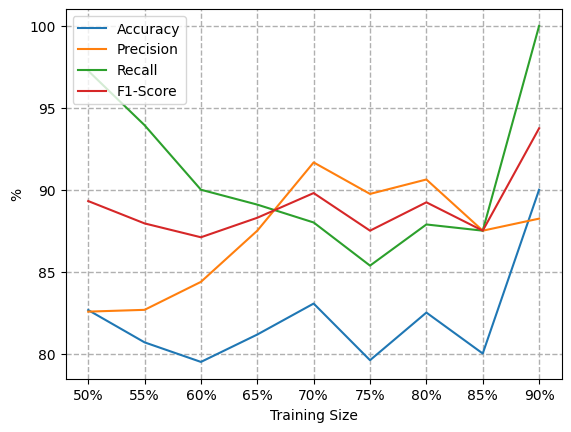

In [13]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , LR_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , LR_matrices['precision'], label="Precision")
plt.plot(training_size , LR_matrices['recall'], label="Recall")
plt.plot(training_size , LR_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

# Second Way

## SPLITTING DATA

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(N_features0, N_target0, test_size=0.3, shuffle=False)

## MAKE A MODEL TO PREDETION

In [15]:
from sklearn.linear_model import LogisticRegression

LRModel=LogisticRegression()

LRModel.fit(x_train,y_train)

y_pred=LRModel.predict(x_test)

#Calculating Details

print('Logistic Regression Model Train Score is : ' , round((LRModel.score(x_train,y_train)*100),2),'%')
print(f"Logistic Regression Model Test Score Is : {round((LRModel.score(x_test,y_test)*100),2)} %")

Logistic Regression Model Train Score is :  83.09 %
Logistic Regression Model Test Score Is : 83.05 %


## Predect New Data

In [16]:
INPUT_DATA=(Positive[0])
# INPUT_DATA=(Negative[0])

INPUT_DATA_NP=np.asarray(INPUT_DATA)
INPUT_DATA_NP_RE=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA=scaler.transform(INPUT_DATA_NP_RE)

PREDICTION=LRModel.predict(FINAL_DATA)

In [17]:
if PREDICTION ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# SVC  

# First Way (Recomended)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

SVC_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train,x_test,y_train,y_test=train_test_split(N_features1, N_target1, test_size=size, shuffle=False)
    
    SVCModel = SVC(kernel= 'sigmoid', max_iter=200, C=1,gamma='auto', probability=True)

    SVCModel.fit(x_train, y_train)

    y_pred  = SVCModel.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    SVC_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test, y_pred)
    SVC_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test, y_pred)
    SVC_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test, y_pred)
    SVC_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

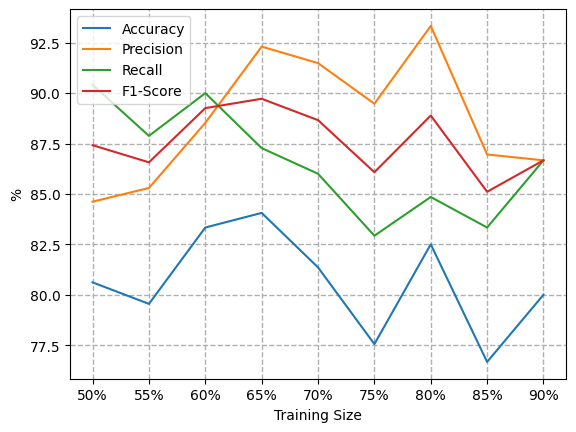

In [19]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , SVC_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , SVC_matrices['precision'], label="Precision")
plt.plot(training_size , SVC_matrices['recall'], label="Recall")
plt.plot(training_size , SVC_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

# Second Way

## SPLITTING DATA

In [20]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(N_features1,N_target1, test_size=0.33,shuffle=False)

## MAKE A MODEL TO PREDETION

In [21]:
from sklearn.svm import SVC

SVCModel = SVC(kernel= 'sigmoid', max_iter=200, C=1,gamma='auto', probability=True)

SVCModel.fit(x_train1, y_train1)

y_pred1  = SVCModel.predict(x_test1)

#Calculating Details

print('SVC Model Train Score Is : ' ,round((SVCModel.score(x_train1,y_train1)*100),2),'%')
print(f"SVC Model Test Score Is : {round((SVCModel.score(x_test1,y_test1)*100),2)} %")

SVC Model Train Score Is :  84.62 %
SVC Model Test Score Is : 83.08 %


## Predect New Data

In [22]:
INPUT_DATA1=(Positive[0])
# INPUT_DATA1=(Negative[0])
INPUT_DATA_NP1=np.asarray(INPUT_DATA1)
INPUT_DATA_NP_RE1=INPUT_DATA_NP.reshape(1,-1)
FINAL_DATA1=scaler.transform(INPUT_DATA_NP_RE1)

PREDICTION1=SVCModel.predict(FINAL_DATA1)

In [23]:
if PREDICTION1 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# KNN

# First Way (Recomended)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

KNN_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train,x_test,y_train,y_test=train_test_split(N_features0, N_target0, test_size=size, shuffle=False)
    
    KNNModel= KNeighborsClassifier()

    KNNModel.fit(x_train,y_train)

    y_pred = KNNModel.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    KNN_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test, y_pred)
    KNN_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test, y_pred)
    KNN_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test, y_pred)
    KNN_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

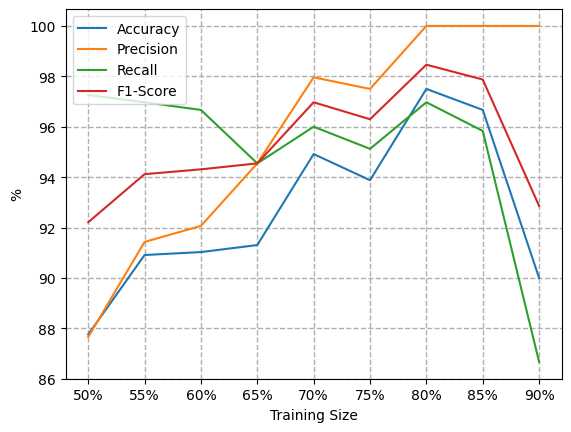

In [25]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , KNN_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , KNN_matrices['precision'], label="Precision")
plt.plot(training_size , KNN_matrices['recall'], label="Recall")
plt.plot(training_size , KNN_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

# Second Way

## SPLITTING DATA

In [26]:
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2=train_test_split(N_features0,N_target0, test_size=0.2,shuffle=False)

## MAKE A MODEL TO PREDETION

In [27]:
from sklearn.neighbors import KNeighborsClassifier

KNNModel= KNeighborsClassifier()

KNNModel.fit(x_train2,y_train2)

y_pred2 = KNNModel.predict(x_test2)

#Calculating Details

print('KNN Model Train Score Is : ' ,round((KNNModel.score(x_train,y_train)*100),2),'%')
print(f"KNN Model Test Score Is : {round((KNNModel.score(x_test,y_test)*100),2)} %")

KNN Model Train Score Is :  96.0 %
KNN Model Test Score Is : 95.0 %


## Predect New Data

In [28]:
INPUT_DATA2=(Positive[0])
# INPUT_DATA2=(Negative[0])
INPUT_DATA_NP2=np.asarray(INPUT_DATA2)

INPUT_DATA_NP_RE2=INPUT_DATA_NP2.reshape(1,-1)

FINAL_DATA2=scaler.transform(INPUT_DATA_NP_RE2)

PREDICTION2=KNNModel.predict(FINAL_DATA2)

In [29]:
if PREDICTION2 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ---------------------------------------------------------------------------------------

# DECISION TREE

# First Wat (Recomended)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

DT_matrices = {"accuracy" : [], "precision" : [], "recall" : [], "f1-score" : []}
size = .5

while size >= .1:

    x_train,x_test,y_train,y_test=train_test_split(N_features0, N_target0, test_size=size, shuffle=False)
    
    DTModel=DecisionTreeClassifier(max_depth=4) 
    
    DTModel.fit(x_train,y_train)

    y_pred=DTModel.predict(x_test)


    accuracy = accuracy_score(y_test, y_pred)
    DT_matrices["accuracy"].append(accuracy * 100)
        
    precision = precision_score(y_test, y_pred)
    DT_matrices["precision"].append(precision * 100)
    
    recall = recall_score(y_test, y_pred)
    DT_matrices["recall"].append(recall * 100)
    
    f1Score = f1_score(y_test, y_pred)
    DT_matrices["f1-score"].append(f1Score * 100)
    
    
    size -= .05

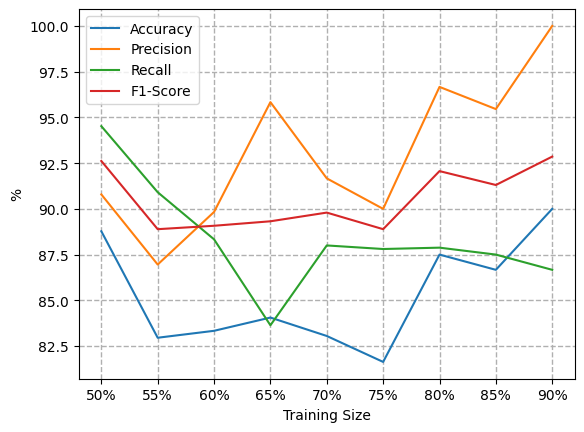

In [31]:
training_size = ["50%","55%","60%", "65%", "70%", "75%", "80%", "85%", "90%"]


plt.plot(training_size , DT_matrices['accuracy'], label="Accuracy")
plt.plot(training_size , DT_matrices['precision'], label="Precision")
plt.plot(training_size , DT_matrices['recall'], label="Recall")
plt.plot(training_size , DT_matrices['f1-score'], label="F1-Score")

plt.ylabel("%")
plt.xlabel("Training Size")
plt.legend(loc="upper left")
plt.grid(linestyle='--', linewidth=1)

# Second Way

## SPLITTING DATA

In [32]:
from sklearn.model_selection import train_test_split
x_train3,x_test3,y_train3,y_test3=train_test_split(N_features0,N_target0, test_size=0.1,shuffle=False)

## MAKE A MODEL TO PREDETION

In [33]:
from sklearn.tree import DecisionTreeClassifier

DTModel=DecisionTreeClassifier(max_depth=4) 

DTModel.fit(x_train3,y_train3)

y_pred3=DTModel.predict(x_test3)


#Calculating Details

print(f"Decision Tree Model Train Score Is : {round((DTModel.score(x_train3,y_train3)*100),2)} %")
print(f"Decision Tree Model Test Score Is : {round((DTModel.score(x_test3,y_test3)*100),2)} %")

Decision Tree Model Train Score Is : 99.43 %
Decision Tree Model Test Score Is : 90.0 %


## Predect New Data

In [34]:
INPUT_DATA3=(Positive[0])
# INPUT_DATA3=(Negative[0])

INPUT_DATA_NP3=np.asarray(INPUT_DATA3)

INPUT_DATA_NP_RE3=INPUT_DATA_NP3.reshape(1,-1)

FINAL_DATA3=scaler.transform(INPUT_DATA_NP_RE3)

PREDICTION3=KNNModel.predict(FINAL_DATA3)

In [35]:
if PREDICTION3 ==1:
    print("Positive , Parkinson's Found")
else :
    print("Negative , No Parkinson's Found")

Positive , Parkinson's Found


# ===================================================

# SCORE OF ERROR

## Zero One Lose

In [36]:
from sklearn.metrics import zero_one_loss
#----------------------------------------------------
print('Logistic Regression')
Z_O_L = zero_one_loss(y_test,y_pred,normalize=False) 
print('Zero One Loss Value : ', Z_O_L )
#----------------------------------------------------
print('\nSVC')

Z_O_L1 = zero_one_loss(y_test1,y_pred1,normalize=False) 
print('Zero One Loss Value : ', Z_O_L1 )
#----------------------------------------------------
print('\nKNN')

Z_O_L2 = zero_one_loss(y_test2,y_pred2,normalize=False) 
print('Zero One Loss Value : ', Z_O_L2 )
#----------------------------------------------------
print("\nDecision TREE")

Z_O_L3 = zero_one_loss(y_test3,y_pred3,normalize=False)
print('Zero One Loss Value : ', Z_O_L3 )

Logistic Regression
Zero One Loss Value :  2

SVC
Zero One Loss Value :  11

KNN
Zero One Loss Value :  1

Decision TREE
Zero One Loss Value :  2


## ROC & AUC

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
y_pred_proba = LRModel.predict_proba(x_test)[::,1]
fpr, tpr, _  = roc_curve(y_test,  y_pred_proba)
auc          = roc_auc_score(y_test, y_pred_proba)
#-------------------------------------------------------------

y_pred_proba1 = SVCModel.predict_proba(x_test1)[::,1]
fpr, tpr, _   = roc_curve(y_test1,  y_pred_proba1)
auc           = roc_auc_score(y_test1, y_pred_proba1)

#-------------------------------------------------------------

y_pred_proba2 = KNNModel.predict_proba(x_test2)[::,1]
fpr, tpr, _   = roc_curve(y_test2,  y_pred_proba2)
auc2          = roc_auc_score(y_test2, y_pred_proba2)
                                     
#-------------------------------------------------------------

y_pred_proba3 = LRModel.predict_proba(x_test3)[::,1]
fpr, tpr, _   = roc_curve(y_test3,  y_pred_proba3)
auc3          = roc_auc_score(y_test3, y_pred_proba3)


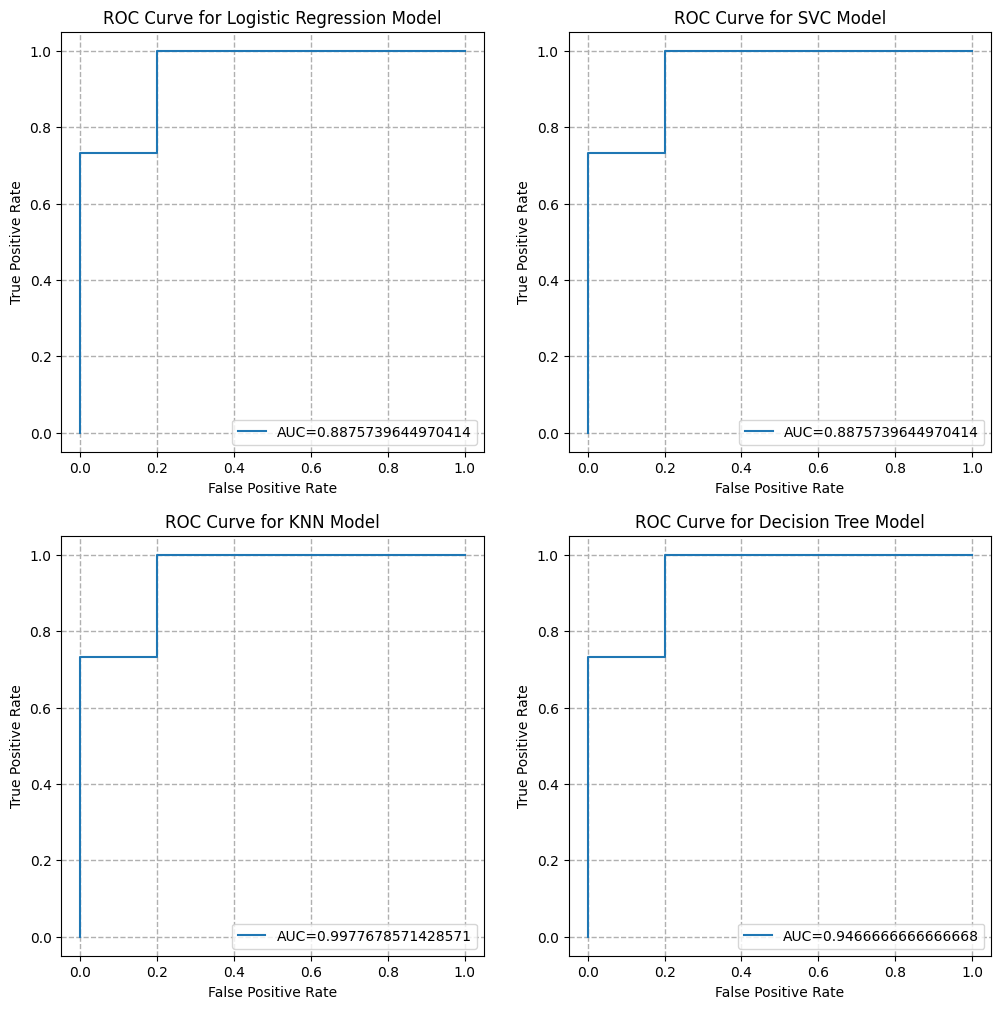

In [39]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.title ('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,2)
plt.plot(fpr,tpr,label="AUC="+str(auc))

plt.title ('ROC Curve for SVC Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,3)
plt.plot(fpr,tpr,label="AUC="+str(auc2))

plt.title ('ROC Curve for KNN Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.subplot(2,2,4)
plt.plot(fpr,tpr,label=f"AUC={str(auc3)}")

plt.title ('ROC Curve for Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(linestyle = '--', linewidth = 1)
plt.legend(loc='lower right')


plt.show()


## Confusion Matrix

In [40]:
#Import Libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns

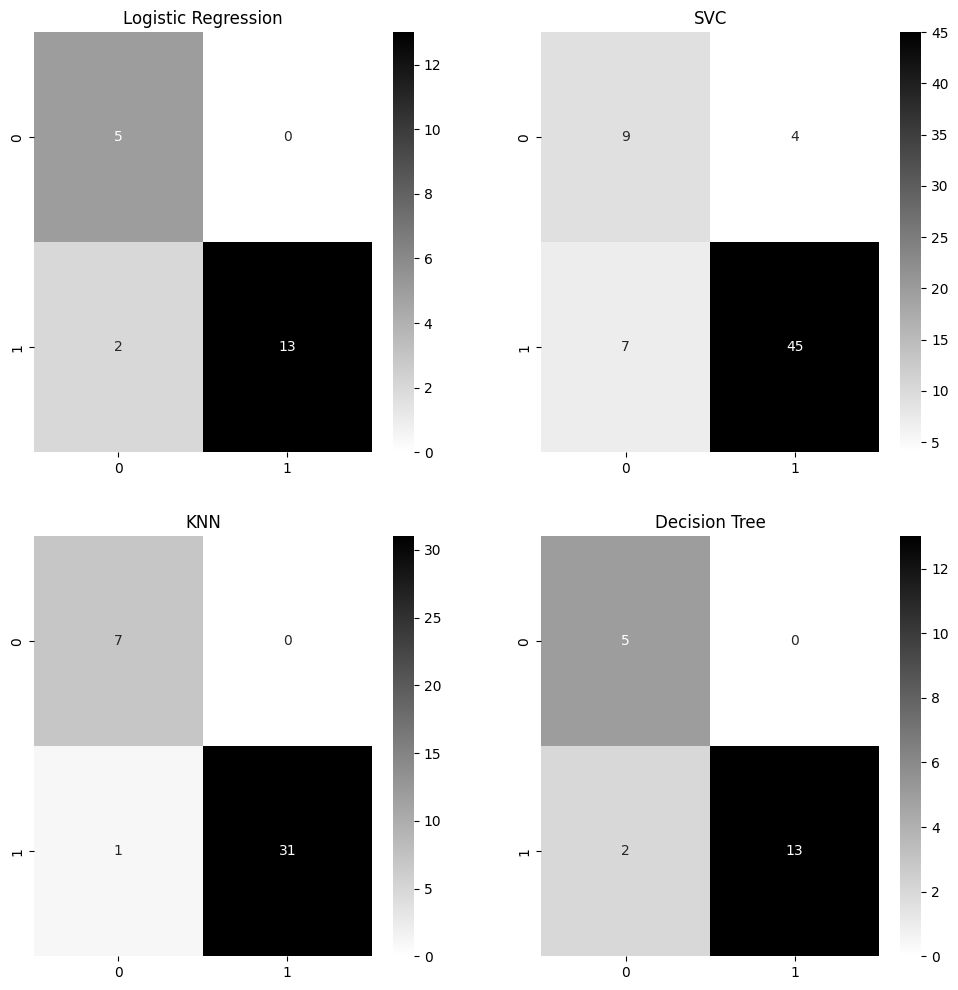

In [41]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
CM = confusion_matrix(y_test,y_pred) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Logistic Regression")

plt.subplot(2,2,2)

CM = confusion_matrix(y_test1,y_pred1) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("SVC")

plt.subplot(2,2,3)

CM = confusion_matrix(y_test2,y_pred2) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("KNN")

plt.subplot(2,2,4)

CM = confusion_matrix(y_test3,y_pred3) #Calculating Confusion Matrix
# drawing confusion matrix
sns.heatmap(CM,annot=True ,cmap='binary')  #CM/np.sum(CM),fmt='.1%'
plt.title("Decision Tree")

plt.show()

# Classification Report (( Percision, Recall, F1-Score ))

In [42]:
?from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Object `from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score` not found.


In [43]:
# #LG
# accuracy =accuracy_score(y_test,y_pred)
# precision=precision_score(y_test,y_pred)
# recall   =recall_score(y_test,y_pred)
# f1_score =f1_score(y_test,y_pred)

# print(f"Precision {precision}\nRecall {recall}\nF1-Score {f1_score}")

In [44]:
# #SVC
# accuracy1 =accuracy_score(y_test1,y_pred1)
# precision1=precision_score(y_test1,y_pred1)
# recall1   =recall_score(y_test1,y_pred1)
# f1_score1 =f1_score(y_test1,y_pred1)

# print(f"Accuracy {accuracy1}\nPrecision {precision1}\nRecall {recall1}\nF1-Score {f1_score1}")

In [45]:
# #KNN
# accuracy2 =accuracy_score(y_test2,y_pred2)
# precision2=precision_score(y_test2,y_pred2)
# recall2   =recall_score(y_test2,y_pred2)
# f1_score2 =f1_score(y_test2,y_pred2)


# print(f"Accuracy {accuracy2}\nPrecision {precision2}\nRecall {recall2}\nF1-Score {f1_score2}")

In [46]:
# #Decision Tree
# accuracy3 =accuracy_score(y_test3,y_pred3)
# precision3=precision_score(y_test3,y_pred3)
# recall3   =recall_score(y_test3,y_pred3)
# f1_score3 =f1_score(y_test3,y_pred3)


# print(f"Accuracy {accuracy3}\nPrecision {precision3}\nRecall {recall3}\nF1-Score {f1_score3}")

# Save Models

In [47]:
# dump(LRModel, 'LogisticRegression.joblib')
# dump(SVCModel,'SupporVectorClassification.joblib')
# dump(KNNModel,'k-NearestNeighbor.joblib')
# dump(DTModel,'DecisionTree.joblib')

# END